In [1]:
from langgraph.graph import StateGraph, START, END 
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv 

In [2]:
model = ChatOpenAI() 

In [20]:
class ContentState(TypedDict):
    title : str 
    outline : str 
    content : str 
    evaluate: str

In [6]:
def create_outline(state: ContentState) -> ContentState:
    # title
    title = state['title']

    # gen outline 
    prompt = f"Create a outline for a blog on the topic: {title}"
    outline = model.invoke(prompt).content

    # Update state 
    state['outline'] = outline

    return state

In [12]:
def create_blog(state: ContentState) -> ContentState:
    title = state['title']
    outline = state['outline']

    prompt = f"Write a detailed blog on the title - {title} using the following outline \n {outline}"

    content = model.invoke(prompt).content

    state['content'] = content 
    
    return state

In [29]:
def evaluate(state: ContentState) -> ContentState:
    content = state['content'] 

    prompt = f"Based on my content - {content}, Rate it from 1 to 10 and give your short opinion" 

    output = model.invoke(prompt).content

    state['evaluate'] = output 

    return state
    

In [30]:
# Graph state 
graph = StateGraph(ContentState)

# Add node
graph.add_node("create_outline", create_outline)
graph.add_node("create_blog", create_blog)
graph.add_node("evaluate", evaluate)

# Add edges 
graph.add_edge(START, 'create_outline') 
graph.add_edge('create_outline', 'create_blog') 
graph.add_edge('create_blog', 'evaluate') 
graph.add_edge('evaluate', END) 

workflow = graph.compile()


In [31]:
intial_state = {'title': "Gaming Revolution"}

final_state = workflow.invoke(intial_state)

In [32]:
print(final_state)

{'title': 'Gaming Revolution', 'outline': "I. Introduction\n    A. Explanation of the gaming industry's evolution over time\n    B. Importance of gaming in modern society\n\nII. Historical Perspective\n    A. Overview of the early days of gaming\n    B. Milestones in gaming history\n    C. Emergence of different gaming platforms\n\nIII. Technology Advancements\n    A. Impact of advancements in technology on gaming\n    B. Introduction of virtual reality and augmented reality in gaming\n    C. Influence of AI and machine learning in gaming development\n\nIV. Changing Trends in Gaming\n    A. Growth of mobile gaming\n    B. Rise of competitive gaming and eSports\n    C. Evolution of game streaming and online communities\n\nV. Social and Cultural Impact\n    A. Influence of gaming on popular culture\n    B. Impact of gaming on social interactions and relationships\n    C. Role of gaming in education and skill development\n\nVI. Future of Gaming\n    A. Predictions for the future of the ga

In [33]:
print(final_state['title'])

Gaming Revolution


In [34]:
print(final_state['outline'])

I. Introduction
    A. Explanation of the gaming industry's evolution over time
    B. Importance of gaming in modern society

II. Historical Perspective
    A. Overview of the early days of gaming
    B. Milestones in gaming history
    C. Emergence of different gaming platforms

III. Technology Advancements
    A. Impact of advancements in technology on gaming
    B. Introduction of virtual reality and augmented reality in gaming
    C. Influence of AI and machine learning in gaming development

IV. Changing Trends in Gaming
    A. Growth of mobile gaming
    B. Rise of competitive gaming and eSports
    C. Evolution of game streaming and online communities

V. Social and Cultural Impact
    A. Influence of gaming on popular culture
    B. Impact of gaming on social interactions and relationships
    C. Role of gaming in education and skill development

VI. Future of Gaming
    A. Predictions for the future of the gaming industry
    B. Potential innovations and trends to watch for
 

In [35]:
print(final_state['content'])

I. Introduction

The gaming industry has come a long way since its inception, evolving from simple arcade games to complex and immersive virtual worlds. In modern society, gaming has become an integral part of entertainment and culture, attracting millions of players from around the world. This blog will explore the gaming revolution, its historical perspective, technological advancements, changing trends, social and cultural impact, and the future of gaming.

II. Historical Perspective

In the early days of gaming, simple games like Pong and Space Invaders paved the way for the industry we know today. Milestones such as the release of the Nintendo Entertainment System (NES) and the rise of PC gaming revolutionized the way we play. The emergence of different gaming platforms, from consoles to handheld devices, has made gaming more accessible to a wider audience.

III. Technology Advancements

Advancements in technology have had a profound impact on the gaming industry. The introduction

In [36]:
print(final_state['evaluate'])

I would rate this content a 9. It provides a comprehensive overview of the gaming industry, covering its historical perspective, technological advancements, changing trends, social and cultural impact, and future outlook. The content is well-organized and informative, making it a valuable read for anyone interested in the gaming industry. Great job!


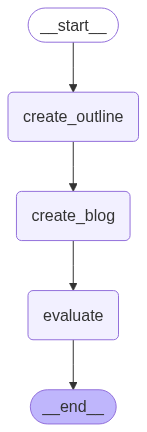

In [37]:
from IPython.display import Image 
Image(workflow.get_graph().draw_mermaid_png())